<a href="https://colab.research.google.com/github/XH4V0C/collab_notebooks/blob/main/CIFAR100_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras import datasets, utils

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar100.load_data() 

169001437/169001437 [==============================] - 3s 0us/step


In [ ]:
NUM_CLASSES = 100

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
y_train = utils.to_categorical(y_train,NUM_CLASSES)
y_test = utils.to_categorical(y_test,NUM_CLASSES)

In [ ]:
X_train[84,10,6,1]

0.32156864

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(255,activation = 'relu'),
    layers.Dense(175,activation = 'relu'),
    layers.Dense(125,activation = 'relu'),
    layers.Dense(100, activation = 'softmax'),
])

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=15,shuffle=True)

Epoch 1/15
782/782 [==============================] - 7s 7ms/step - loss: 4.3292 - accuracy: 0.0407
Epoch 2/15
782/782 [==============================] - 6s 7ms/step - loss: 3.9819 - accuracy: 0.0857
Epoch 3/15
782/782 [==============================] - 5s 7ms/step - loss: 3.8657 - accuracy: 0.1050
Epoch 4/15
782/782 [==============================] - 6s 8ms/step - loss: 3.7779 - accuracy: 0.1211
Epoch 5/15
782/782 [==============================] - 5s 6ms/step - loss: 3.7073 - accuracy: 0.1323
Epoch 6/15
782/782 [==============================] - 6s 8ms/step - loss: 3.6583 - accuracy: 0.1419
Epoch 7/15
782/782 [==============================] - 5s 6ms/step - loss: 3.6180 - accuracy: 0.1490
Epoch 8/15
782/782 [==============================] - 6s 7ms/step - loss: 3.5824 - accuracy: 0.1559
Epoch 9/15
782/782 [==============================] - 5s 7ms/step - loss: 3.5463 - accuracy: 0.1627
Epoch 10/15
782/782 [==============================] - 5s 6ms/step - loss: 3.5200 - accuracy: 0.1649

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.5100 - accuracy: 0.1708


[3.5099539756774902, 0.17080000042915344]

In [ ]:
CLASSES = np.array(['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow', 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'])

In [ ]:
preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

313/313 [==============================] - 1s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
n_to_show = 20

In [ ]:
indices = np.random.choice(range(len(X_test)),n_to_show)

In [ ]:
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4))

<Figure size 1080x216 with 0 Axes>

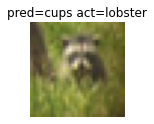

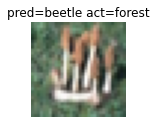

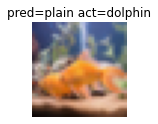

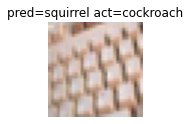

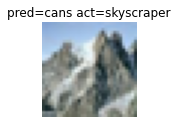

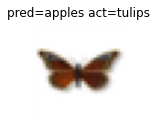

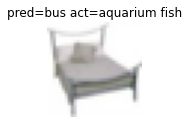

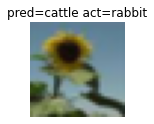

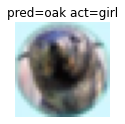

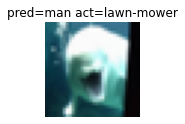

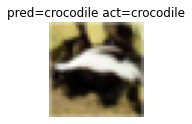

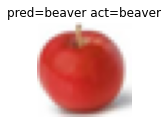

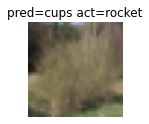

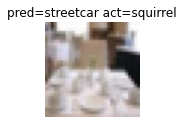

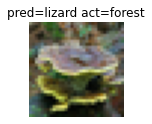

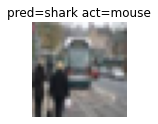

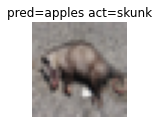

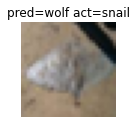

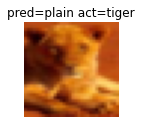

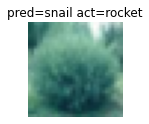

In [ ]:
for i, idx in enumerate(indices):
  img = X_test[idx]
  plt.figure(figsize=(20,8))
  plt.subplot(2,5,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title('pred='+str(preds_single[idx]+' act='+str(actual_single[idx])))